In [15]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import glob
import itertools
import collections
import os
import imageio
from scipy import misc
from PIL import Image
%matplotlib inline

In [2]:
train_files = list(glob.iglob('../../data/plant-seed/download/train/**/*.png', recursive=True))
test_files = list(glob.iglob('../../data/plant-seed/download/test/**/*.png', recursive=True))

### data explore

In [3]:
print('lenght of trainset:', len(train_files))
print('length of testset:', len(test_files))

lenght of trainset: 4750
length of testset: 794


In [4]:
classes = collections.Counter([x.split('/')[-2] for x in train_files])

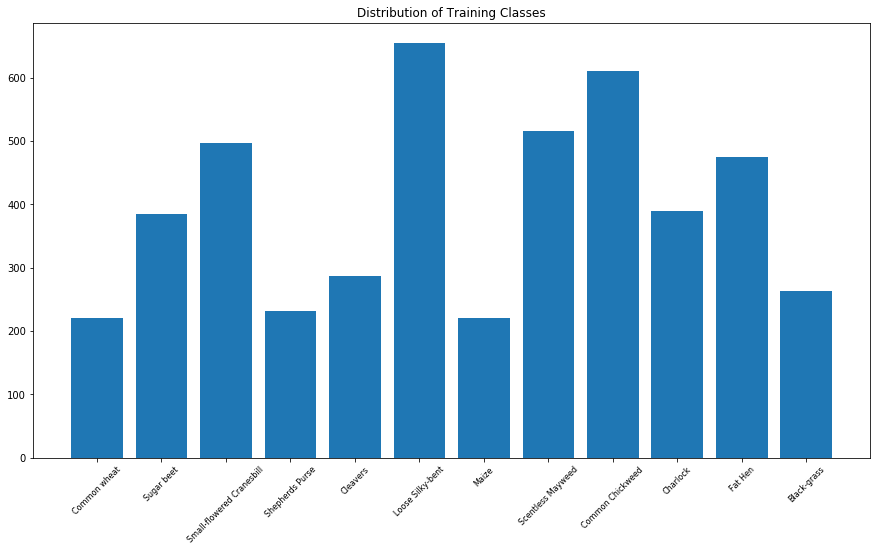

In [5]:
plt.figure(figsize=(15,8))
plt.bar(range(len(classes)), classes.values())
plt.xticks(range(len(classes)), classes.keys(), fontsize=8, rotation=45)
plt.title('Distribution of Training Classes')
plt.show()

### create validation sample

In [6]:
np.random.seed(123)
valid_files = np.random.choice(train_files, size=750, replace=False)
train_files = [x for x in train_files if x not in valid_files]
print('lenght of trainset:', len(train_files))
print('length of validset:', len(valid_files))

lenght of trainset: 4000
length of validset: 750


In [7]:
def convert(file, save):
    try:
        image = imageio.imread(file)
        imageio.imwrite(save, image[:, :, :3])
    except IOError:
        directory = save[:-13]
        os.makedirs(directory)
        imageio.imwrite(save, image[:, :, :3])
    return None

In [8]:
sizes = []

for idx, file in enumerate(train_files):
    convert(file, file.replace('download','data'))
    size = misc.imread(file.replace('download','data')).shape
    sizes.append(size)
    if idx % 400 == 0:
        print('{} files transferred'.format(idx))
    
print('data description:')
print('# of images:', len(list(glob.iglob('../../data/plant-seed/data/train/**/*.png', recursive=True))))
print('shape:', np.mean(sizes, axis=0), np.std(sizes, axis=0))

0 files transferred
400 files transferred
800 files transferred
1200 files transferred
1600 files transferred
2000 files transferred
2400 files transferred
2800 files transferred
3200 files transferred
3600 files transferred
data description:
# of images: 4000
shape: [ 367.604   367.9925    3.    ] [ 312.0306943   314.31247341    0.        ]


In [11]:
sizes = []

for idx, file in enumerate(valid_files):
    convert(file, file.replace('download','data').replace('train','valid'))
    size = misc.imread(file.replace('download','data').replace('train','valid')).shape
    sizes.append(size)
    if idx % 400 == 0:
        print('{} files transferred'.format(idx))

print('data description:')
print('# of images:', len(list(glob.iglob('../../data/plant-seed/data/valid/**/*.png', recursive=True))))
print('shape:', np.mean(sizes, axis=0), np.std(sizes, axis=0))

0 files transferred
400 files transferred
data description:
# of images: 750
shape: [ 387.40266667  389.99066667    3.        ] [ 351.19176603  366.65609488    0.        ]


### class images

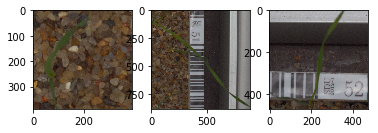

In [16]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/data/valid/Black-grass/0183fdf68.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/data/valid/Black-grass/0260cffa8.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/data/valid/Black-grass/075d004bc.png'))
plt.show()

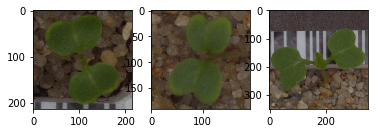

In [17]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/data/valid/Charlock/084a9cb18.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/data/valid/Charlock/09f038ce4.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/data/valid/Charlock/137c4e78e.png'))
plt.show()

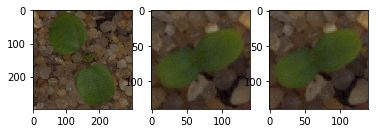

In [18]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/data/valid/Cleavers/01605ed73.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/data/valid/Cleavers/06f447848.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/data/valid/Cleavers/06f447848.png'))
plt.show()

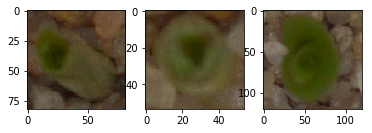

In [19]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/data/valid/Maize/0184ec53f.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/data/valid/Maize/16e38d4af.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/data/valid/Maize/19f880311.png'))
plt.show()